Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [1]:
%run ImportFunctions.ipynb

2024-04-02 18:01:41.808090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 18:01:43.740690: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-02 18:01:43.741011: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-02 18:01:48.341187: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

# [2] Import Libraries

In [2]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [4]:
# Load images and labels
images = np.load('/content/drive/My Drive/FYP/dataset/random_images.npy')
labels = np.load('/content/drive/My Drive/FYP/dataset/random_labels.npy')

## [3.2] Jupyter

In [3]:
# Load images and labels
images = np.load('dataset/random_images.npy')
labels = np.load('dataset/random_labels.npy')

# [4] Prepare Dataset

In [4]:
images = resize_images(images, (299,299))

In [5]:
# Display array shapes
display_array_shapes(images, labels)

+--------------+--------------------+
| Array Name   | Shape              |
+==============+====================+
| Images       | (957, 299, 299, 3) |
+--------------+--------------------+
| Labels       | (957,)             |
+--------------+--------------------+


In [6]:
# Get the number of unique labels
num_classes = len(np.unique(labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [7]:
# Binarize labels
labels_binarized = binarize_labels(labels)

# [5] Train Model

In [8]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (765, 299, 299, 3) (765, 9)
Validation shape: (96, 299, 299, 3) (96, 9)
Test shape: (96, 299, 299, 3) (96, 9)


In [9]:
# Build and compile InceptionV3 model
inceptionv3_model = build_and_compile_inceptionv3_model(num_classes)

2024-04-02 18:03:03.736105: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 18:03:03.741564: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 18:03:03.754750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Train the model
inceptionv3_history = inceptionv3_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(X_val, y_val)

2024-04-02 18:03:11.722534: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 820701180 exceeds 10% of free system memory.


Epoch 1/10


2024-04-02 18:03:20.968101: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


 1/19 [>.............................] - ETA: 2:31 - loss: 2.7561 - accuracy: 0.2143

2024-04-02 18:03:22.392806: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


 2/19 [==>...........................] - ETA: 16s - loss: 8.6643 - accuracy: 0.2500 

2024-04-02 18:03:23.297153: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


 3/19 [===>..........................] - ETA: 13s - loss: 9.5737 - accuracy: 0.2857

2024-04-02 18:03:24.024323: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 232339968 exceeds 10% of free system memory.


19/19 [==============================] - 27s 1s/step - loss: 11.9278 - accuracy: 0.4248 - val_loss: 8.4527 - val_accuracy: 0.5104
Epoch 2/10
19/19 [==============================] - 16s 869ms/step - loss: 1.6519 - accuracy: 0.8601 - val_loss: 6.4798 - val_accuracy: 0.6875
Epoch 3/10
19/19 [==============================] - 16s 869ms/step - loss: 0.5901 - accuracy: 0.9399 - val_loss: 5.6192 - val_accuracy: 0.7396
Epoch 4/10
19/19 [==============================] - 17s 890ms/step - loss: 0.2751 - accuracy: 0.9569 - val_loss: 4.6366 - val_accuracy: 0.7188
Epoch 5/10
19/19 [==============================] - 17s 884ms/step - loss: 0.1528 - accuracy: 0.9843 - val_loss: 6.1802 - val_accuracy: 0.6771
Epoch 6/10
19/19 [==============================] - 17s 903ms/step - loss: 0.0138 - accuracy: 0.9974 - val_loss: 4.2780 - val_accuracy: 0.7500
Epoch 7/10
19/19 [==============================] - 16s 863ms/step - loss: 2.3647e-04 - accuracy: 1.0000 - val_loss: 4.4407 - val_accuracy: 0.7917
Epoch 8/

In [11]:
# Calculate average loss and accuracy
average_loss = sum(inceptionv3_history.history['val_loss']) / len(inceptionv3_history.history['val_loss'])
average_accuracy = sum(inceptionv3_history.history['val_accuracy']) / len(inceptionv3_history.history['val_accuracy'])

print(f"Average Validation Loss: {average_loss}, Average Validation Accuracy: {average_accuracy}")

Average Validation Loss: 5.305394983291626, Average Validation Accuracy: 0.7218749940395355


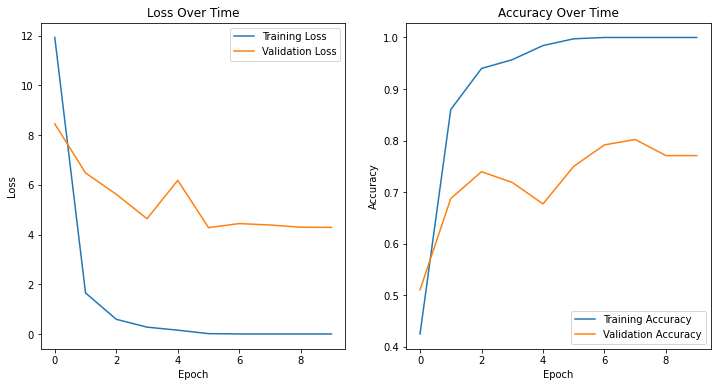

In [12]:
plot_training_history(inceptionv3_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save model
inceptionv3_model.save('/content/drive/MyDrive/FYP/models/InceptionV3_random')

## [6.2] Jupyter

In [13]:
# Save model
inceptionv3_model.save('models/InceptionV3_random')

INFO:tensorflow:Assets written to: models/InceptionV3_random/assets


INFO:tensorflow:Assets written to: models/InceptionV3_random/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/InceptionV3_random')

## [6.2] Jupyter

In [15]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('models/InceptionV3_random')

# [7] Test and Analyse

In [16]:
# Evaluate the model on the test data
inceptionv3_test_loss, inceptionv3_test_accuracy = loaded_inceptionv3_model.evaluate(X_test, y_test)
print(f"Test Loss: {inceptionv3_test_loss}, Test Accuracy: {inceptionv3_test_accuracy}")

3/3 [==============================] - 4s 652ms/step - loss: 2.6475 - accuracy: 0.7917
Test Loss: 2.64745831489563, Test Accuracy: 0.7916666865348816


In [17]:
inceptionv3_predicted_labels, inceptionv3_true_labels_list = make_predictions_and_evaluate(loaded_inceptionv3_model, X_test, y_test)

3/3 [==============================] - 3s 649ms/step


In [18]:
calculate_classification_metrics(inceptionv3_true_labels_list, inceptionv3_predicted_labels)

Accuracy: 0.7917
Precision: 0.7821
Recall: 0.7556
F1 Score: 0.7686


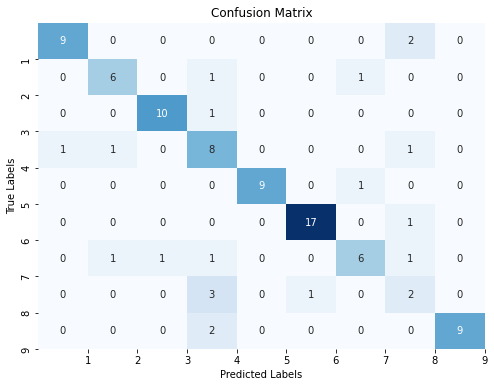

In [19]:
display_confusion_matrix(inceptionv3_true_labels_list, inceptionv3_predicted_labels)